In [39]:
#!pip install xgboost  

### 載入訓練數據

In [46]:
import pandas as pd
import numpy as np

def cos_transform(x):
    return np.cos(x/90*np.pi)

df = pd.read_csv("C_s_result_all_100.csv", index_col=0)
s_result_all = df.to_numpy()
s_result_all=s_result_all[0:18000,:]

new_arr = s_result_all.reshape((100, 180, 25))
mean_arr = np.mean(new_arr, axis=0)
mean_arr=mean_arr.transpose()


### 訓練模型

In [44]:

def plot4view(s_result_all):
    print(s_result_all.shape)
    plt.subplots(1,4,figsize=(10,3))    
    for i in range(4):
        plt.subplot(141+i)
        print(s_result_all[1+1+i*6,0:granularity])
        plt.plot(s_result_all[1+0+i*6,0:granularity], label = "l1")
        plt.plot(s_result_all[1+1+i*6,0:granularity], label = "l2")# 1 表示為 角度（答案）
        plt.plot(s_result_all[1+2+i*6,0:granularity], label = "l3")
        plt.plot(s_result_all[1+3+i*6,0:granularity], label = "l4")
        plt.plot(s_result_all[1+4+i*6,0:granularity], label = "l5")
        plt.plot(s_result_all[1+5+i*6,0:granularity], label = "l6")
        plt.legend()
    plt.show()


### 保存模型

(25, 180)
[127.29 125.34 123.96 123.13 121.76 119.67 118.85 117.18 114.75 114.29
 111.83 109.5  108.34 106.22 104.31 103.5  101.5   99.38  97.45  96.19
  93.67  92.06  91.21  89.16  87.01  85.41  84.11  81.53  79.36  77.15
  75.84  74.21  72.8   71.32  69.39  67.48  66.84  64.61  62.5   61.65
  59.34  57.38  56.98  55.57  53.26  51.96  50.52  49.07  47.5   44.8
  44.04  42.83  41.7   40.3   38.19  37.42  36.33  34.67  34.05  32.09
  30.38  29.25  27.78  27.56  26.29  24.52  23.    22.25  21.36  20.11
  18.86  18.41  17.91  16.73  15.98  15.03  13.76  14.07  13.34  12.91
  12.4   11.61  10.79  11.11  10.42   9.82   9.06   9.12   9.     9.54
   7.73   9.04   8.36   9.72   9.2    9.68  10.48  10.63  10.78  11.45
  11.63  11.66  12.24  13.06  13.9   14.52  15.61  16.67  16.68  17.64
  19.36  20.05  20.94  21.24  22.94  24.07  24.87  26.63  26.86  29.21
  29.89  30.46  31.06  34.12  34.88  35.22  37.62  39.55  41.06  41.78
  43.42  45.19  46.57  48.4   49.08  51.83  52.44  54.45  55.35  57.

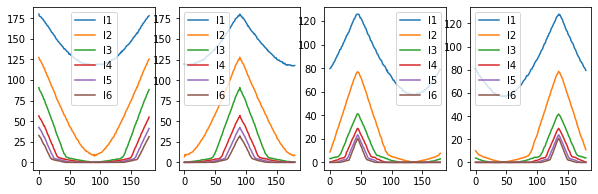

In [45]:
from matplotlib import pyplot as plt

granularity=180

plot4view(mean_arr)


In [43]:
DF = pd.DataFrame(np.transpose(mean_arr))
 
# save the dataframe as a csv file
DF.to_csv("C_batch_feature.csv")

In [62]:
y=np.array([111 ,  5  , 1 ,  0  , 0 ,  0 ,155 , 90 , 52 , 24 , 14 , 10,  64  , 1 ,  0 ,  0 ,  0 ,  0 , 75  ,16 ,  1 ,  0   ,0 ,  0])


In [63]:
y2=np.array([118,  10 ,  1 ,  0 ,  0 ,  0 ,160 , 97 , 60 , 30 , 20 , 10 , 79 ,  5 ,  2 ,  0 ,  0  , 0
  ,84 , 26 ,  2 ,  0 ,  0 ,  0])

0 45939 46727 46155
1 43795 44594 44016
2 43207 44045 43448
3 42491 43347 42742
4 41647 42481 41887
5 40293 41186 40562
6 39516 40364 39762
7 38574 39453 38836
8 37105 37997 37373
9 36715 37552 36956
10 35437 36287 35684
11 34198 35078 34460
12 33518 34363 33763
13 32324 33199 32584
14 31334 32211 31595
15 30670 31464 30889
16 29770 30534 29974
17 28746 29552 28971
18 27991 28810 28222
19 27267 27984 27448
20 26364 27136 26572
21 25740 26484 25934
22 25429 26092 25583
23 24726 25406 24888
24 24067 24700 24206
25 23666 24293 23802
26 23266 23818 23364
27 22748 23271 22832
28 22133 22686 22232
29 21871 22403 21959
30 21585 22046 21638
31 21327 21821 21396
32 21266 21656 21283
33 21219 21590 21226
34 21115 21431 21095
35 20968 21225 20919
36 21055 21227 20963
37 20844 20976 20732
38 20978 21103 20863
39 21059 21092 20898
40 21019 21068 20866
41 20997 20989 20815
42 21373 21274 21146
43 21488 21331 21232
44 21477 21312 21217
45 21255 21092 20996
46 20778 20597 20510
47 19892 19664 19600
48

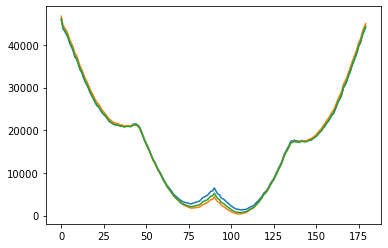

In [64]:
mean_arr
ssdArr=np.zeros(180)
ssdArr2=np.zeros(180)
ssdArr12=np.zeros(180)
y12=0.5*y+0.5*y2
for i in range(180):
    ssd = np.sum((y - mean_arr[1:,i]) ** 2)
    ssd2 = np.sum((y2 - mean_arr[1:,i]) ** 2)
    ssd12 = np.sum((y12 - mean_arr[1:,i]) ** 2)
    print(i,int(ssd),int(ssd2),int(ssd12) )
    ssdArr[i]=ssd
    ssdArr2[i]=ssd2
    ssdArr12[i]=ssd12
    
plt.plot(ssdArr)
plt.plot(ssdArr2)
plt.plot(ssdArr12)

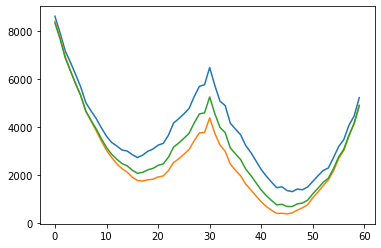

In [65]:
plt.plot(ssdArr[60:120])
plt.plot(ssdArr2[60:120])
plt.plot(ssdArr12[60:120])